# # Job Posting Clustering Analysis


In [9]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jovyan/feature_reasoning/doeun/AI_job/Labor-market-trends/embedding_analysis')
import matplotlib.font_manager as fm
from job_posting_map import load_embedding_data
from clustering_analysis import (
    filter_platform,
    filter_ai_jobs,
    add_time_periods,
    perform_pca,
    calculate_centroids,
    extract_representative_docs,
    plot_centroid_movement,
    print_statistics
)

font_path = '/home/jovyan/feature_reasoning/doeun/NanumGothic.ttf'
fm.FontProperties(fname=font_path)
plt.rc('font', family='NanumGothic')

In [2]:
metadata, embeddings = load_embedding_data("job_embeddings_ko_sbert_preprocessed.pkl")
print(f"데이터: {len(metadata):,}개")

데이터: 371,591개


## 센트로이드 분석 (플랫폼별)
Wanted (2년 단위)

In [3]:
md_wanted, emb_wanted = filter_platform(metadata, embeddings, "wanted")
md_wanted = add_time_periods(md_wanted, date_col="expiration_date", period_months=24)

# AI 관련 직무 필터링
try:
    md_wanted_ai, emb_wanted_ai = filter_ai_jobs(md_wanted, emb_wanted)
    if len(md_wanted_ai) > 10:
        coords_wanted_ai = scaler_wanted.transform(emb_wanted_ai)
        coords_wanted_ai = pca_wanted.transform(coords_wanted_ai)
        centroids_wanted_ai = calculate_centroids(
            md_wanted_ai[md_wanted_ai.index.isin(md_wanted.index)].copy(),
            coords_wanted_ai, min_samples=5
        )
        has_ai_wanted = True
    else:
        has_ai_wanted = False
except:
    has_ai_wanted = False

[wanted] 필터링: 110,588개
날짜 범위: 2014-10-13 ~ 2031-09-30
기간 단위: 24개월
총 기간 수: 8


In [4]:
# PCA
coords_wanted, pca_wanted, scaler_wanted = perform_pca(emb_wanted, n_components=2)

# 센트로이드
centroids_wanted = calculate_centroids(md_wanted, coords_wanted, min_samples=10)
rep_docs_wanted = extract_representative_docs(md_wanted, coords_wanted, 
                                              centroids_wanted, n_docs=5)
print(f"Wanted 기간 수: {len(centroids_wanted)}")

PCA 설명 분산: [0.07752285 0.05957931]
총 설명 분산: 13.71%
Wanted 기간 수: 5


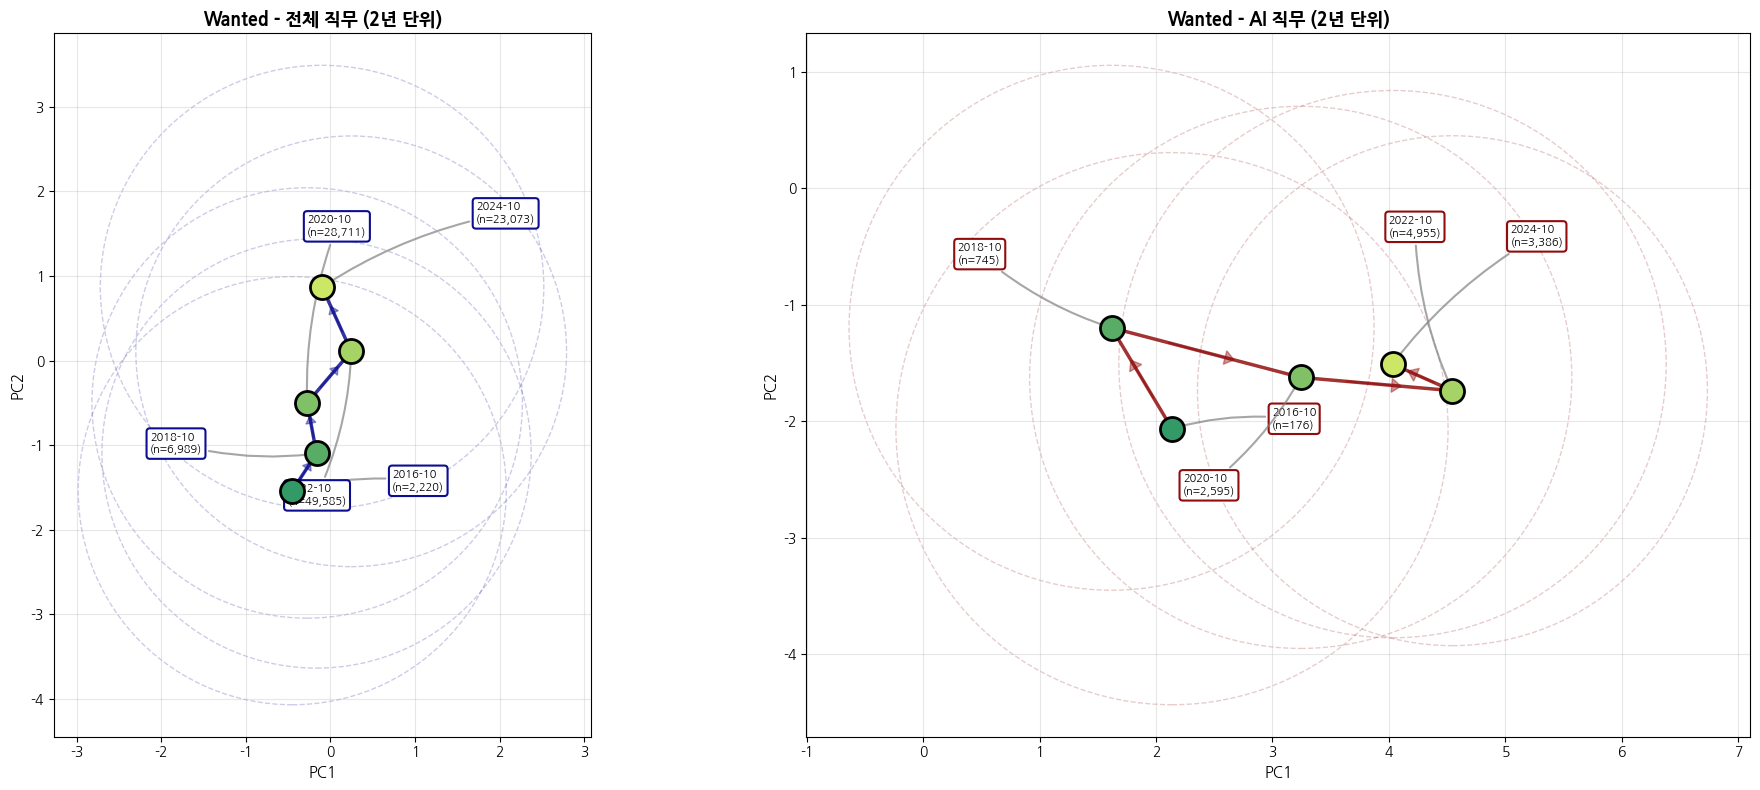

In [10]:
n_plots = 2 if has_ai_wanted else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_wanted, 
                      "Wanted - 전체 직무 (2년 단위)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_wanted:
    plot_centroid_movement(axes[1], centroids_wanted_ai,
                          "Wanted - AI 직무 (2년 단위)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
# plt.savefig("centroid_wanted.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
print_statistics(centroids_wanted, "WANTED - 전체 직무", rep_docs_wanted)
if has_ai_wanted:
    rep_docs_wanted_ai = extract_representative_docs(
        md_wanted_ai[md_wanted_ai.index.isin(md_wanted.index)].copy(),
        coords_wanted_ai, centroids_wanted_ai, n_docs=5
    )
    print_statistics(centroids_wanted_ai, "WANTED - AI 직무", rep_docs_wanted_ai)


📊 WANTED - 전체 직무

기간별 센트로이드 및 대표 문서:
----------------------------------------------------------------------

📅 2016-10: (-0.45, -1.54) [N=2,220]
   대표 문서:
   1. [wanted] • 와디즈에서 오픈을 원하는 리워드 프로젝트를 심사하는 역할
      거리: 0.292
   2. [wanted] • 금융상품 플랫폼 서비스기획
      거리: 0.316
   3. [wanted] • 요기요/배달통 사장님향 플랫폼 기획(PC/APP)   • 사장님 회원/레스토랑 운영/메뉴 관련 시스템 기획
      거리: 0.391
   4. [wanted] • 심리상담 및 심리케어 콘텐츠용(채팅상담, 심리검사 등) 웹 및 React Native 하이브리드 앱(Web, App)  • 전문 상담사가 상담을 진행(채팅 등)하는 상담사 플랫
      거리: 0.440
   5. [wanted] [1] 서비스기획 파트  주요 업무   - 서비스 요구사항 수집, 발굴, 정리     > 다양한 서비스들을 분석하여 Insight 도출     > 국내외  마켓 Research를 
      거리: 0.600

📅 2018-10: (-0.16, -1.10) [N=6,989]
   대표 문서:
   1. [wanted] · Develop a deep understanding of the Pivo Software and Hardware to help customers troubleshoot and 
      거리: 0.198
   2. [wanted] 1. 具外銷服裝打版能力(擅用打版軟體尤佳) 2. 熟悉打版/放縮/馬克，對數字、尺寸敏銳度佳 3. 能獨立作業，善溝通
      거리: 0.236
   3. [wanted] - 수주 프로젝트 별 고객/협력사 커뮤니케이션 - 플랫폼에 기반한 서비스 설계, 기획
      거리: 0.325
   4. [wanted] 1. 콴다 서비스

## work24

In [13]:
md_work24, emb_work24 = filter_platform(metadata, embeddings, "work24")
md_work24 = add_time_periods(md_work24, date_col="expiration_date", period_months=2)

try:
    md_work24_ai, emb_work24_ai = filter_ai_jobs(md_work24, emb_work24)
    if len(md_work24_ai) > 10:
        coords_work24_ai = scaler_wanted.transform(emb_work24_ai)
        coords_work24_ai = pca_wanted.transform(coords_work24_ai)
        centroids_work24_ai = calculate_centroids(
            md_work24_ai[md_work24_ai.index.isin(md_work24.index)].copy(),
            coords_work24_ai, min_samples=5
        )
        has_ai_work24 = True
    else:
        has_ai_work24 = False
except:
    has_ai_work24 = False


[work24] 필터링: 200,582개
날짜 범위: 2025-08-05 ~ 2025-12-15
기간 단위: 2개월
총 기간 수: 3
AI 직무 필터링: 508개 (0.3%)


In [14]:
coords_work24, pca_work24, scaler_work24 = perform_pca(emb_work24)
centroids_work24 = calculate_centroids(md_work24, coords_work24, min_samples=10)
print(f"Work24 기간 수: {len(centroids_work24)}")
rep_docs_work24 = extract_representative_docs(md_work24, coords_work24,
                                              centroids_work24, n_docs=5)

PCA 설명 분산: [0.10686867 0.04816022]
총 설명 분산: 15.50%
Work24 기간 수: 3


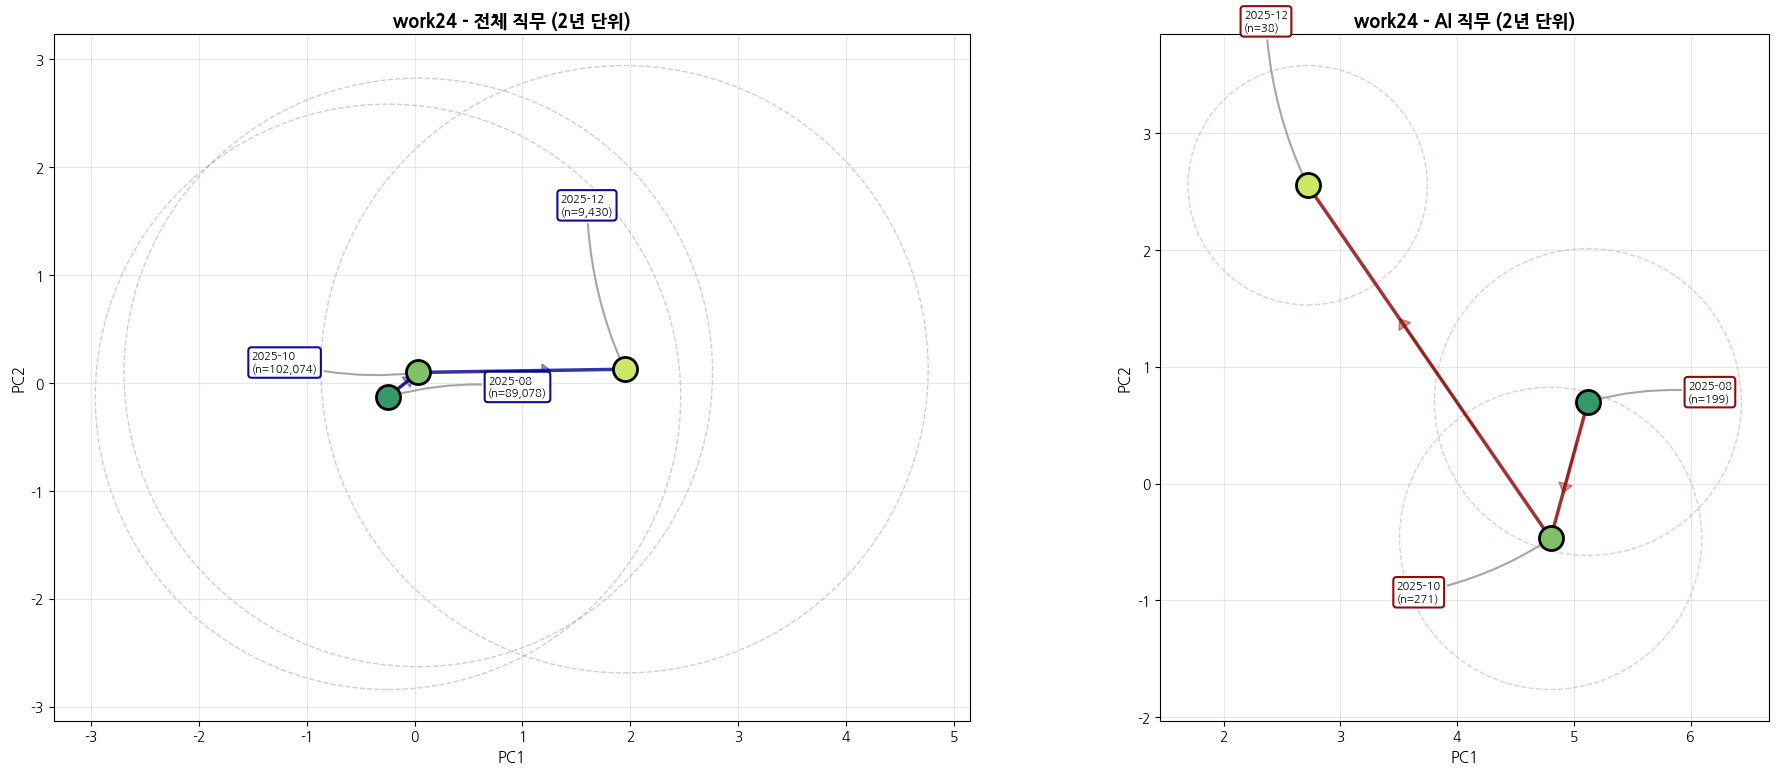

In [19]:
n_plots = 2 if has_ai_work24 else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_work24, 
                      "work24 - 전체 직무 (2년 단위)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_work24:
    plot_centroid_movement(axes[1], centroids_work24_ai,
                          "work24 - AI 직무 (2년 단위)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
# plt.savefig("centroid_wanted.png", dpi=300, bbox_inches="tight")
plt.show()

## Saramin

In [21]:
md_saramin, emb_saramin = filter_platform(metadata, embeddings, "saramin")
md_saramin = add_time_periods(md_saramin, date_col="expiration_date", period_months=2)

try:
    md_saramin_ai, emb_saramin_ai = filter_ai_jobs(md_saramin, emb_saramin)
    if len(md_saramin_ai) > 10:
        coords_saramin_ai = scaler_wanted.transform(emb_saramin_ai)
        coords_saramin_ai = pca_wanted.transform(coords_saramin_ai)
        centroids_saramin_ai = calculate_centroids(
            md_saramin_ai[md_saramin_ai.index.isin(md_saramin.index)].copy(),
            coords_saramin_ai, min_samples=5
        )
        has_ai_saramin = True
    else:
        has_ai_saramin = False
except:
    has_ai_saramin = False


[saramin] 필터링: 60,421개
날짜 범위: 2025-08-30 ~ 2033-12-31
기간 단위: 2개월
총 기간 수: 6
AI 직무 필터링: 835개 (1.4%)


In [22]:
# PCA
coords_saramin, pca_saramin, scaler_saramin = perform_pca(emb_saramin)

# 센트로이드
centroids_saramin = calculate_centroids(md_saramin, coords_saramin, min_samples=10)
print(f"Saramin 기간 수: {len(centroids_saramin)}")

# 대표 문서 추출
rep_docs_saramin = extract_representative_docs(md_saramin, coords_saramin,
                                               centroids_saramin, n_docs=5)

PCA 설명 분산: [0.05687161 0.04197254]
총 설명 분산: 9.88%
Saramin 기간 수: 5


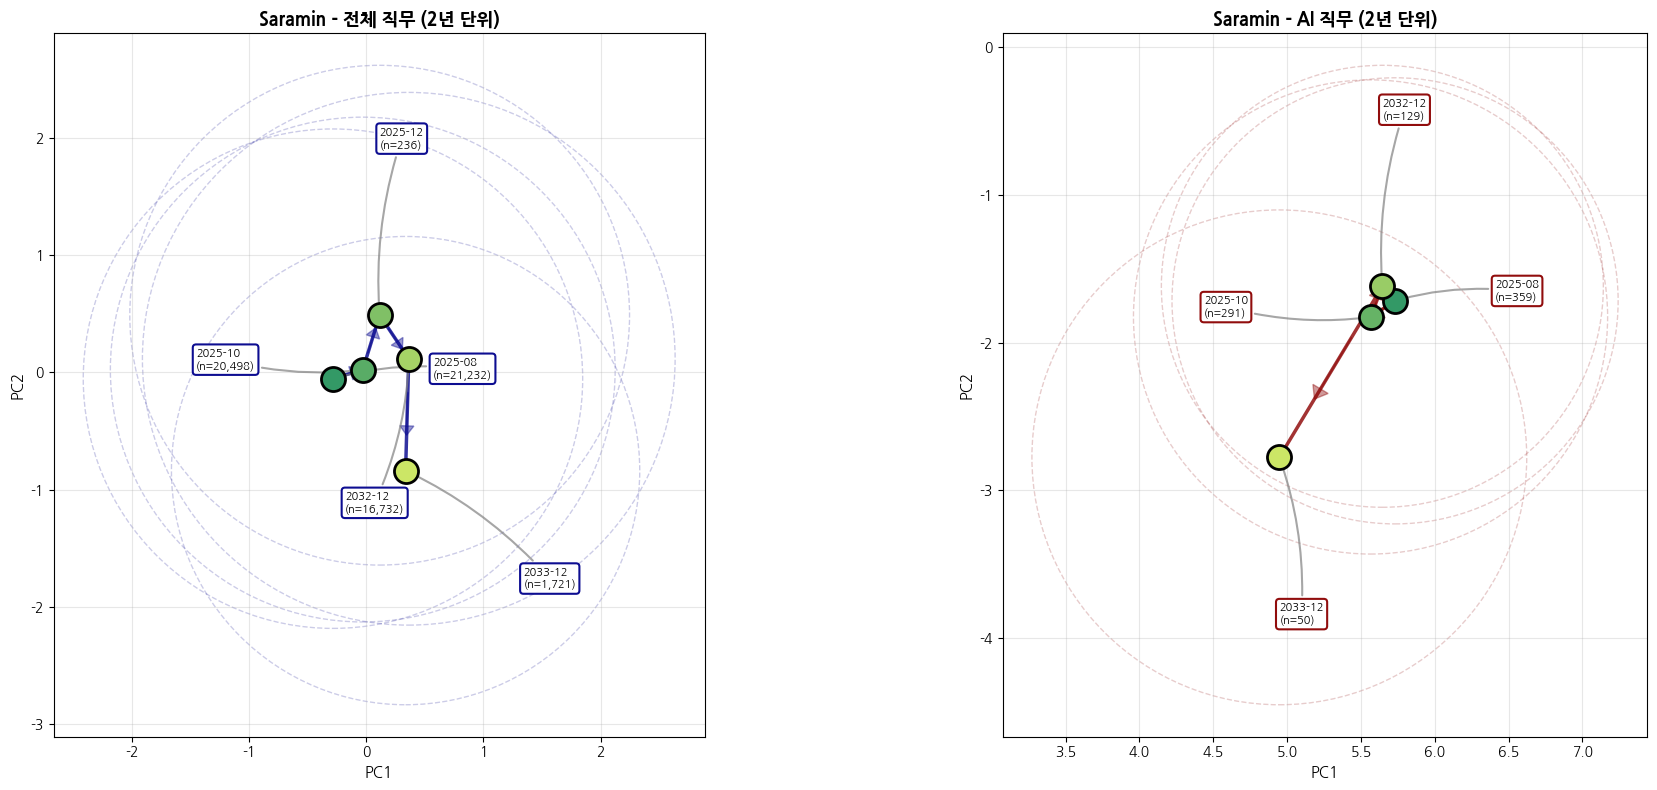

In [23]:
n_plots = 2 if has_ai_saramin else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_saramin, 
                      "Saramin - 전체 직무 (2년 단위)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_work24:
    plot_centroid_movement(axes[1], centroids_saramin_ai,
                          "Saramin - AI 직무 (2년 단위)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
plt.show()

In [ ]:
# end of documents